In [1]:
# Feature Extraction.

In [2]:
!nvidia-smi

Thu Dec  8 04:45:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Get data (10% of training data)
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-12-08 04:45:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.0MB/s    in 8.2s    

2022-12-08 04:45:33 (19.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# Unzip the data
zipref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

  # set up the target directory (we'll view the images from here)

  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


['588118.jpg']
Image shape: (307, 512, 3)


array([[[121, 112,  97],
        [119, 110,  95],
        [117, 108,  93],
        ...,
        [115, 106,  91],
        [127, 120, 104],
        [132, 125, 109]],

       [[116, 107,  92],
        [116, 107,  92],
        [116, 107,  92],
        ...,
        [111, 102,  87],
        [120, 113,  97],
        [132, 125, 109]],

       [[112, 103,  88],
        [114, 105,  90],
        [116, 107,  92],
        ...,
        [135, 128, 112],
        [131, 124, 108],
        [127, 120, 104]],

       ...,

       [[ 38,  29,  22],
        [ 30,  21,  16],
        [ 21,  13,  10],
        ...,
        [ 17,  14,   9],
        [ 16,  13,   8],
        [ 16,  13,   8]],

       [[ 38,  29,  22],
        [ 30,  21,  16],
        [ 21,  13,  10],
        ...,
        [ 17,  14,   9],
        [ 16,  13,   8],
        [ 16,  13,   8]],

       [[ 38,  29,  22],
        [ 30,  21,  16],
        [ 21,  13,  10],
        ...,
        [ 17,  14,   9],
        [ 16,  13,   8],
        [ 16,  13,   8]]

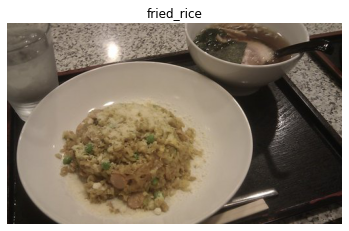

In [8]:
view_random_image(target_dir = "10_food_classes_10_percent/train/",
                  target_class = "fried_rice")

In [9]:
# import tensorflow as tf
# import datetime

# def tensorBoard_callback(dir_name, experiment_name):
#   log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y-%m-%d")
#   tensor_board_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
#   return tensor_board_callback

In [10]:
# resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
# efficient_net_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [11]:
# import tensorflow_hub as hub


# def create_model(model_url, num_classes = 10):
#   feature_extractor_layer = hub.KerasLayer(model_url,
#                                            trainable = False,
#                                            input_shape = IMAGE_SHAPE+(3,),
#                                            name = "feature_extraction_layer")
  
#   model = tf.keras.Sequential([
#       feature_extractor_layer,
#       tf.keras.layers.Dense(num_classes, activation = "softmax",
#                             name = "output_layer")
#   ])
#   return model

In [12]:
# resnet_model = create_model(resnet_url,
#              num_classes=train_data.num_classes)

In [13]:
# resnet_model.compile(loss = "categorical_crossentropy",
#                      optimizer = tf.keras.optimizers.Adam(),
#                      metrics = ["accuracy"])

In [14]:
# history_resnet = resnet_model.fit(train_data,
#                                   epochs = 5,
#                                   steps_per_epoch = len(train_data),
#                                   validation_data = test_data,
#                                   validation_steps = len(test_data),
#                                   callbacks = [tensorBoard_callback(dir_name = "tensorflow_hub",
#                                                                     experiment_name = "resnet_v2_50")])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_datagen  = ImageDataGenerator(rescale = 1/255.)
test_datagen  = ImageDataGenerator(rescale = 1/255.)

print("Training Images")

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMAGE_SHAPE,
                                               batch_size = BATCH_SIZE,
                                               class_mode = "categorical")

print("Testing Images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode = "categorical")

Training Images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


**Callbacks**
* TensorBoard callback
* ModelCheckpoint callback
* EarlyStoppinng callback

In [16]:
# Creating tensorboard callback
import tensorflow as tf
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  # log_dir: the path of the directory,
  # where to save the log files to be parsed by TensorBoard.
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"saving TensorBoard log files to : {log_dir}")
  return tensorboard_callback


In [17]:
# models creation using tensorflow HUB
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"



In [18]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [19]:
# A function to create model from tensorflow hub url
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           name = "feature_extraction_layer",
                                           trainable = False, #Freeze the Patterns.
                                           input_shape = IMAGE_SHAPE+(3,),)
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = "softmax",
                            name = "output_layer")
  ])
  return model
  

In [20]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data.num_classes)

In [21]:
resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

In [22]:
history_resnet = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name = "tensorflow_hub",
                                                                         experiment_name = "resnet50V2")])

saving TensorBoard log files to : tensorflow_hub/resnet50V2/20221208-044553
Epoch 1/5
24/24 [==============================] - 31s 823ms/step - loss: 1.9738 - accuracy: 0.3320 - val_loss: 1.2462 - val_accuracy: 0.6088
Epoch 2/5
24/24 [==============================] - 17s 709ms/step - loss: 0.9353 - accuracy: 0.7067 - val_loss: 0.8718 - val_accuracy: 0.7244
Epoch 3/5
24/24 [==============================] - 17s 743ms/step - loss: 0.6289 - accuracy: 0.8160 - val_loss: 0.7979 - val_accuracy: 0.7380
Epoch 4/5
24/24 [==============================] - 17s 735ms/step - loss: 0.4830 - accuracy: 0.8573 - val_loss: 0.7230 - val_accuracy: 0.7732
Epoch 5/5
24/24 [==============================] - 16s 702ms/step - loss: 0.3975 - accuracy: 0.8960 - val_loss: 0.7097 - val_accuracy: 0.7724


In [23]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [24]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  
  Args:
    history: tensorflow history object.

  Reurns:
    plots of training/validation loss and accuracy metrics.
    """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "train_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss Curves")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()

  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy Curves")
  plt.xlabel("epochs")
  plt.legend()

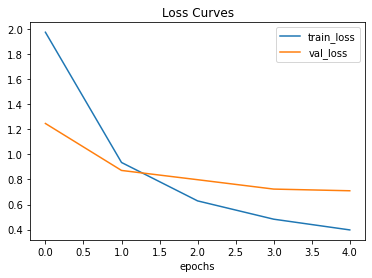

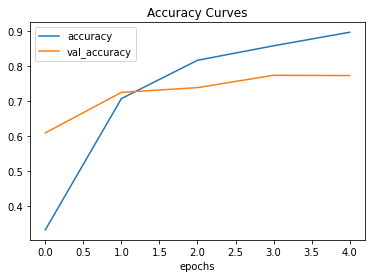

In [25]:
plot_loss_curves(history_resnet)

In [26]:
efficient_net_model = create_model(efficientnet_url,
                                   num_classes= train_data.num_classes)

In [27]:
efficient_net_model.compile(loss = "categorical_crossentropy",
                            optimizer = tf.keras.optimizers.Adam(),
                            metrics = ["accuracy"])

In [28]:
history_efficient_net = efficient_net_model.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("tensorflow_hub",
                                                                 "efficientnet_b0")])

saving TensorBoard log files to : tensorflow_hub/efficientnet_b0/20221208-044746
Epoch 1/5
24/24 [==============================] - 26s 741ms/step - loss: 1.8116 - accuracy: 0.4480 - val_loss: 1.2828 - val_accuracy: 0.7160
Epoch 2/5
24/24 [==============================] - 16s 705ms/step - loss: 1.0516 - accuracy: 0.7760 - val_loss: 0.8603 - val_accuracy: 0.8140
Epoch 3/5
24/24 [==============================] - 16s 708ms/step - loss: 0.7500 - accuracy: 0.8400 - val_loss: 0.6949 - val_accuracy: 0.8356
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.6057 - accuracy: 0.8760 - val_loss: 0.6096 - val_accuracy: 0.8508
Epoch 5/5
24/24 [==============================] - 16s 671ms/step - loss: 0.5145 - accuracy: 0.8800 - val_loss: 0.5600 - val_accuracy: 0.8552


In [29]:
efficient_net_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


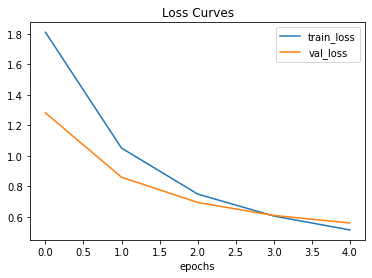

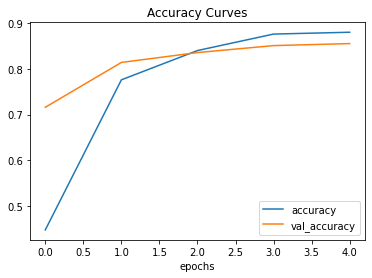

In [30]:
plot_loss_curves(history_efficient_net)

In [31]:
len(efficient_net_model.layers[0].weights)

309

**Types of Transfer Learning**

* "**As is**" transfer Learning using an existing model with no changes (Using Imagenet model on 1000 Imagenet classes, none of ur own)

* "**Feature Extraction Transfer Learning**" use the pre-learned patterns of an existing model (efficient net and resnet models)

* "**Fine- Tuning**" Use the prelearned patterns of an existing model and fine tune many or all of the underlying layers (including new output layers.)

**Uploading code on Tensorboard.dev**

In [36]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "efficientnet_b0 vs resNet50V2" \
  --description "Comapring 2 different TF hub feature extractioon model architectures using 10% of the training data" \
  --one_shot



***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=SgK2HHj4A0tjYnF3587bfeQswVtmcK&prompt=consent&access_type=off

In [37]:
!tensorboard dev list

https://tensorboard.dev/experiment/6dWAR4xLS7CvMxE0nWpv1Q/
	Name                 efficientnet_b0 vs resNet50V2
	Description          Comapring 2 different TF hub feature extractioon model architectures using 10% of the training data
	Id                   6dWAR4xLS7CvMxE0nWpv1Q
	Created              2022-12-08 04:57:18 (11 minutes ago)
	Updated              2022-12-08 04:57:24 (11 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5794895
Total: 1 experiment(s)
